# Bedmachine Grids
**Description:**  Gridded data in EPSG 3431 projection. Topographic layers, uncertainties, and masks.

Requires an EarthData login, see [link](../../how_to/download_NASA_data.ipynb) for how to configure this. 

**Dataset:** 

National Snow and Ice Data Center. “IceBridge BedMachine Greenland, Version 5,” October 21, 2020. https://nsidc.org/data/idbmg4/versions/5.

**Associated paper:** 

N.A.

In [1]:
%%capture
%load_ext autoreload
%autoreload 2

import pygmt

from polartoolkit import fetch, maps, regions, utils

In [2]:
layer_names = [
    # topographies
    "surface",
    "icebase",
    "bed",
    # uncertainties
    "errbed",
    # others
    "thickness",
    "dataid",
    "geoid",
    "mask",
    "source",
]

grids = []
for name in layer_names:
    data = fetch.bedmachine(
        layer=name,
        hemisphere="north",
        # available options
        # reference ("eigen-6c4" or "ellipsoid")
        # region,
        # spacing,
        # registration ("g" for gridline or "p" for pixel),
    )
    grids.append(data)
    print(f"Info for {name}")
    _ = utils.get_grid_info(data, print_info=True)
    print("##########")

Info for surface
grid spacing: 150.0 m
grid region: (-653000.0, 879700.0, -3384350.0, -632750.0)
grid zmin: 0.0
grid zmax: 3673.38549805
grid registration: p
##########
Info for icebase
grid spacing: 150.0 m
grid region: (-653000.0, 879700.0, -3384350.0, -632750.0)
grid zmin: -1913.28369141
grid zmax: 3673.34838867
grid registration: p
##########
Info for bed
grid spacing: 150.0 m
grid region: (-653000.0, 879700.0, -3384350.0, -632750.0)
grid zmin: -5571.67285156
grid zmax: 3673.34838867
grid registration: p
##########
Info for errbed
grid spacing: 150.0 m
grid region: (-653000.0, 879700.0, -3384350.0, -632750.0)
grid zmin: 0.0
grid zmax: 1000.0
grid registration: p
##########
Info for thickness
grid spacing: 150.0 m
grid region: (-653000.0, 879700.0, -3384350.0, -632750.0)
grid zmin: 0.0
grid zmax: 3409.73779297
grid registration: p
##########
Info for dataid
grid spacing: 150.0 m
grid region: (-653000.0, 879700.0, -3384350.0, -632750.0)
grid zmin: 0.0
grid zmax: 10.0
grid registratio

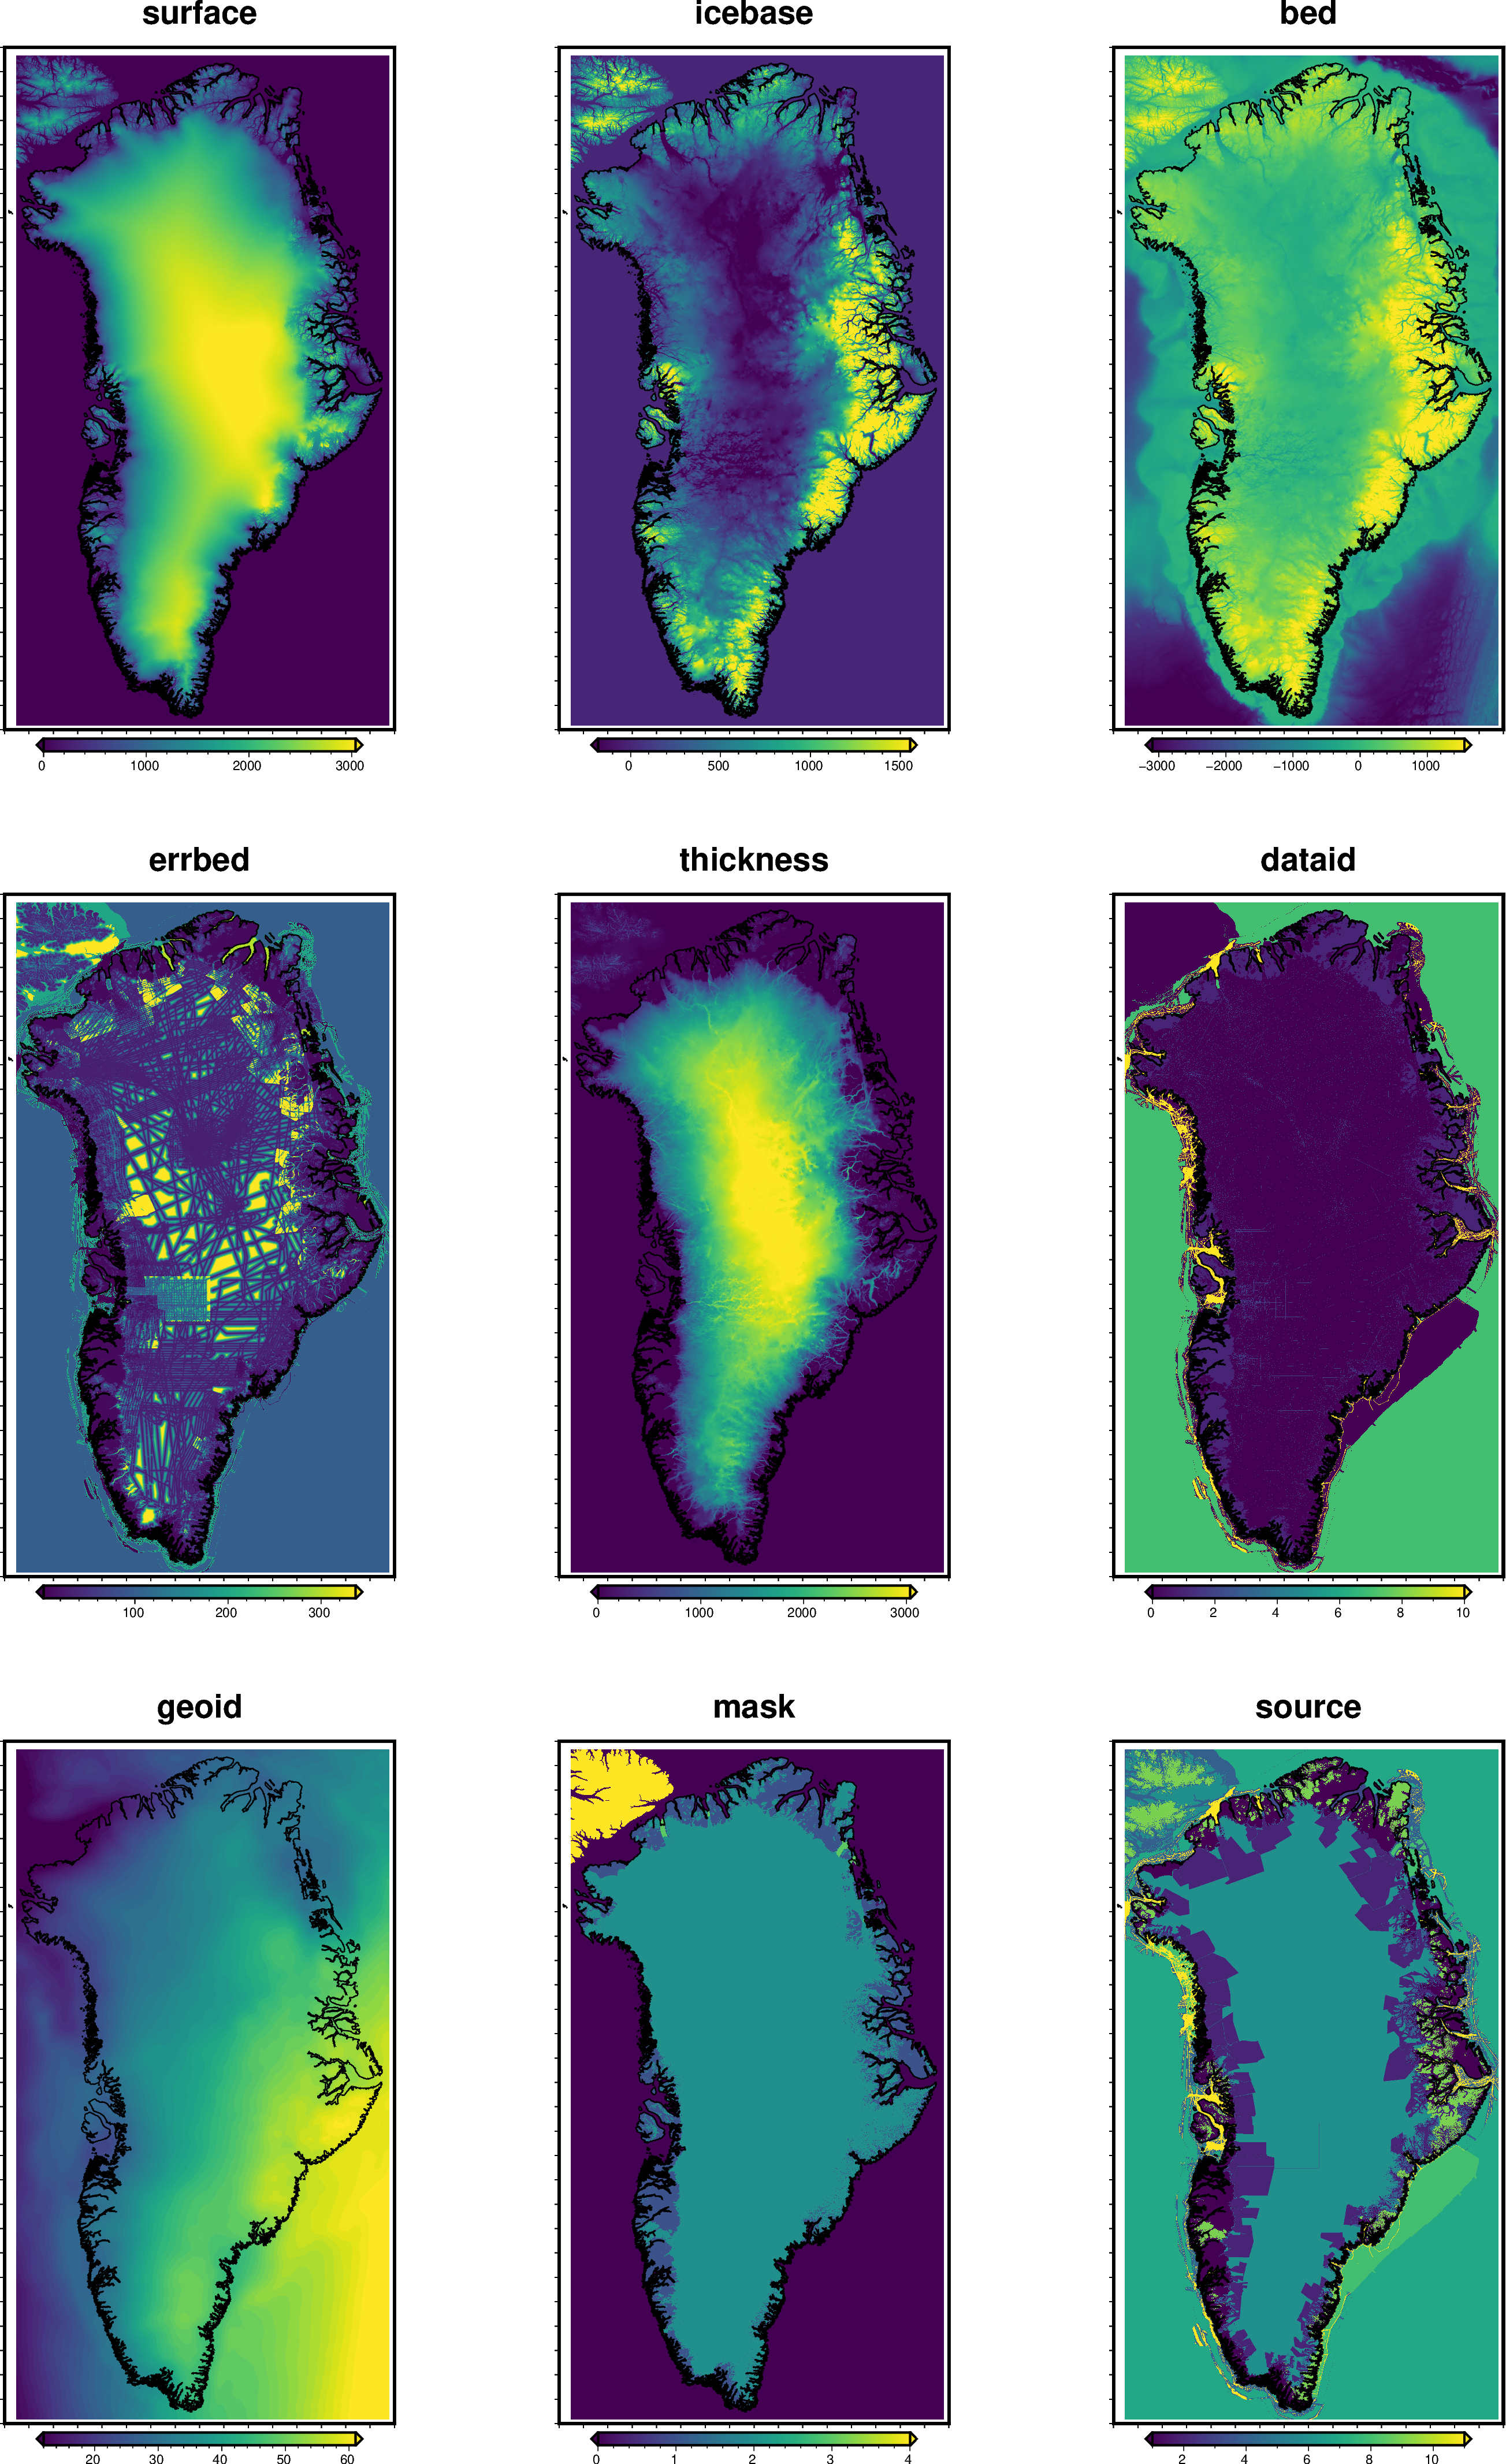

In [3]:
subplot_dimensions = utils.square_subplots(len(layer_names))

region = regions.greenland
_, _, fig_width, fig_height = utils.set_proj(
    region,
    hemisphere="north",
    fig_height=15,
)

fig = pygmt.Figure()

with fig.subplot(
    nrows=subplot_dimensions[0],
    ncols=subplot_dimensions[1],
    subsize=(fig_width, fig_height),
    frame="f",
    margins="1.5c",
):
    for i, (layer, grid) in enumerate(zip(layer_names, grids)):
        with fig.set_panel(panel=i):
            # plot the grids
            maps.plot_grd(
                grid,
                fig=fig,
                title=layer,
                origin_shift=None,
                region=region,
                coast=True,
                robust=True,
                hemisphere="north",
            )
fig.show(dpi=200)